In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Making an simple EDA
Here we are going to look at different data parts so we can try to see trends on the data.
Graphs we are going to look at:
* Graph between different features mainly involving alcohol and other features with quality as a color scale  
* Coeficcients of correlation between the data 

In [6]:
px.histogram(df,x = 'quality')

Below we are going to create a new feature in the data that is the relative amount of free sulfur in relation to the amount of total sulfur

In [7]:
# finding the percentage between free aand total sulphur dioxide 
df['relative sulphur'] = df['free sulfur dioxide']/df['total sulfur dioxide']

In [8]:
#lets make some plots
print([i for i in df.columns])
fig = px.imshow(df.corr())
fig.show()
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'relative sulphur']


In [9]:
px.scatter(df,x = 'alcohol',y = 'pH', color = 'quality')

In [10]:
px.scatter(df,x = 'alcohol',y = 'volatile acidity' , color = 'quality')

In [11]:
px.scatter(df ,y = 'citric acid', x = 'alcohol', color = 'quality')

In [12]:
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

In [13]:
px.scatter(df , x = 'alcohol', y = 'relative sulphur',color = 'quality')

# Cleaning the Data and reshowing the data.
* Removing the outliers using z-score.
* Reshow the data.

Observations:


**BEWARE WITH THE CHANGE IN THE COLOR SCALE**


**COLOR SCALE IS ONLY GOOD TO SEE TREND IN DATA IN THIS CASE**

In [14]:
import scipy.stats as stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [15]:
px.histogram(df,x= 'quality')

In [16]:
fig = px.imshow(df.corr())
fig.show()

In [17]:
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

In [18]:
px.scatter(df,x = 'alcohol',y = 'pH', color = 'quality')

In [19]:
px.scatter(df,x = 'alcohol',y = 'volatile acidity' , color = 'quality')

In [20]:
px.scatter(df ,y = 'citric acid', x = 'alcohol', color = 'quality')

In [21]:
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

In [22]:
px.scatter(df , x = 'alcohol', y = 'relative sulphur',color = 'quality')

In [23]:
n_neigh = len(np.unique(df['quality']))
y = df.pop('quality')

x = df.values

# Scaling the data and building the models.

In [24]:
from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
SE.fit(x_train)
x_train = SE.transform(x_train)
x_test = SE.transform(x_test)

In [25]:
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(x_train,y_train)
print(f'Average K neighbors precision {model.score(x_test,y_test)}')

Average K neighbors precision 0.5482093663911846


In [26]:
model2 = RandomForestClassifier(max_depth =30 , n_estimators = 200,random_state= 42)
model2.fit(x_train,y_train)
print(f'Average Random Forest precision {model2.score(x_test,y_test)}')

Average Random Forest precision 0.6942148760330579


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.61      0.66      0.64       147
           6       0.55      0.55      0.55       150
           7       0.38      0.40      0.39        47
           8       0.00      0.00      0.00         5

    accuracy                           0.55       363
   macro avg       0.31      0.32      0.32       363
weighted avg       0.52      0.55      0.54       363

[[ 0  8  5  1  0]
 [ 2 97 43  5  0]
 [ 0 45 83 22  0]
 [ 1  7 20 19  0]
 [ 0  1  1  3  0]]


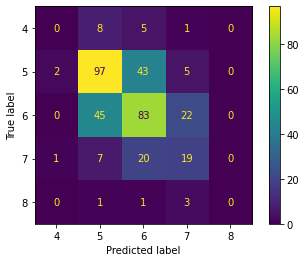

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, x_test, y_test) 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.73      0.79      0.76       147
           6       0.67      0.73      0.70       150
           7       0.63      0.57      0.60        47
           8       0.00      0.00      0.00         5

    accuracy                           0.69       363
   macro avg       0.41      0.42      0.41       363
weighted avg       0.66      0.69      0.67       363



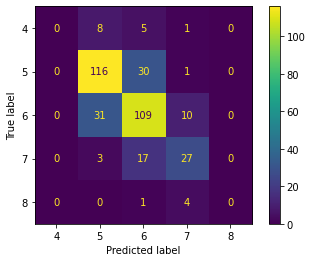

In [28]:
prediction2 = model2.predict(x_test)
print(classification_report(y_test,prediction2))
plot_confusion_matrix(model2, x_test, y_test) 
plt.show()

# Conclusion
What did we do on this notebook?
* First we looked at the data
* After that we removed the outliers
* Then we reshowed the data with the removal of the outliers 
* After that we scaled the data so the models could have a better prediction
* Then we builded 2 models of classification with multiple classes 
* Then we ploted the confusion matrix for each model prediction 
* We also showed the precision, recall and the f1 score for every class.

 As we can see the results were very pleasing with an mean precision of 69% for the random Forest and a 54% mean precision for the k neighbors model.
 
 Thank you for your time and if you liked the notebook please give it an up. Any comments on how to improve the notebook please leave it below
